# Laboratory 1 - Introduction

Exercise 1


In [7]:
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_curve, roc_auc_score

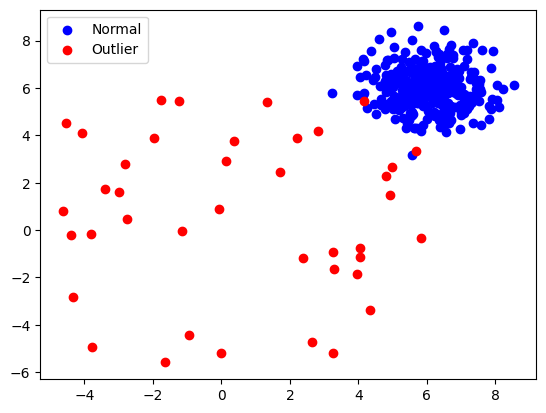

In [5]:
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = generate_data(
    n_train=400,
    n_test=100,
    n_features=2,
    contamination=0.1,
    random_state=42
)

normal = X_train[y_train == 0]
outliers = X_train[y_train == 1]


plt.scatter(normal[:, 0], normal[:, 1], c='blue', label='Normal')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outlier')

plt.legend()
plt.show()



Linear regression with markedly distant anomalies

5
7


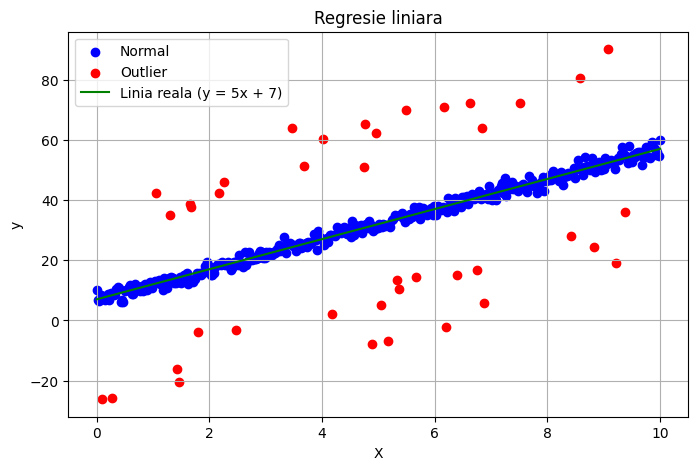

In [8]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 400
contamination = 0.1
n_outliers = int(contamination * n_samples)

X = np.linspace(0, 10, n_samples)

a = np.random.randint(1, 15)
print(a)
b = np.random.randint(1, 15)
print(b)

y = a * X + b + np.random.normal(0, 1.5, n_samples)

outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)

signs = np.random.choice([-1, 1], n_outliers)
distances = np.random.uniform(20, 40, n_outliers)
y[outlier_indices] += signs * distances

labels = np.zeros(n_samples)
labels[outlier_indices] = 1

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X[labels == 0], y[labels == 0], color='blue', label='Normal')
plt.scatter(X[labels == 1], y[labels == 1], color='red', label='Outlier')
plt.plot(X, a * X + b, color='green', label=f'Linia reala (y = {a}x + {b})')
plt.title('Regresie liniara')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Exercise 2


Train conf matrix:
 [[359   1]
 [  4  36]]
Accuracy 0.949
Test conf matrix:
 [[90  0]
 [ 1  9]]
Accuracy 0.95


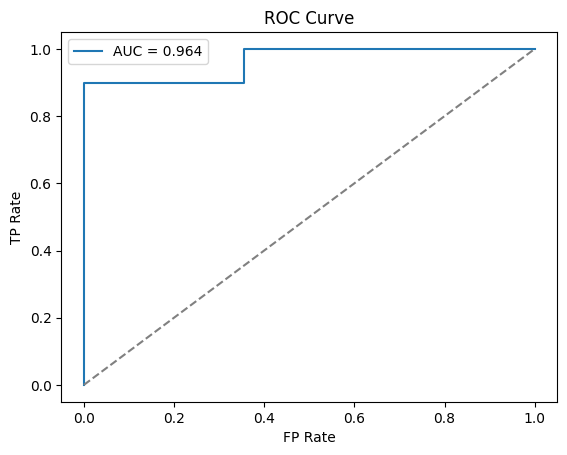

In [10]:

cont = 0.1
model = KNN(contamination=cont)
model.fit(X_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


conf_m_train = confusion_matrix(y_train, y_pred_train)
ba_train = balanced_accuracy_score(y_train, y_pred_train)
print("Train conf matrix:\n", conf_m_train)
print("Accuracy", round(ba_train, 3))


conf_m_test = confusion_matrix(y_test, y_pred_test)
ba_test = balanced_accuracy_score(y_test, y_pred_test)
print("Test conf matrix:\n", conf_m_test)
print("Accuracy", round(ba_test, 3))


scores_test = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, scores_test)
auc = roc_auc_score(y_test, scores_test)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


z-score threshold: 0.930
Accuracy: 0.839


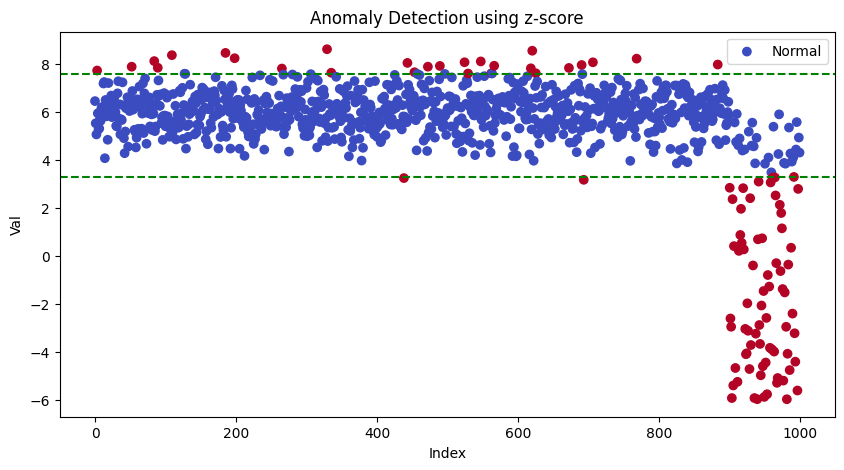

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from pyod.utils.data import generate_data


X_train, X_test, y_train, y_test = generate_data(
    n_train=1000,
    n_test=0,
    n_features=1,
    contamination=0.1,
    random_state=42
)

X = X_train.ravel()
y_true = y_train

z_scores = np.abs((X - np.mean(X)) / np.std(X))

thr = np.quantile(z_scores, 0.9)

y_pred = (z_scores > thr).astype(int)

bal_acc = balanced_accuracy_score(y_true, y_pred)

print(f"z-score threshold: {thr:.3f}")
print(f"Accuracy: {bal_acc:.3f}")

plt.figure(figsize=(10, 5))
plt.scatter(range(len(X)), X, c=y_pred, cmap='coolwarm', label='Normal')
plt.axhline(np.mean(X) + thr * np.std(X), color='green', linestyle='--', label='')
plt.axhline(np.mean(X) - thr * np.std(X), color='green', linestyle='--', label='')
plt.title("Anomaly Detection using z-score")
plt.xlabel("Index")
plt.ylabel("Val")
plt.legend()
plt.show()


Inliers: 900, Outliers: 100
thr=2.592, bal_acc=0.983


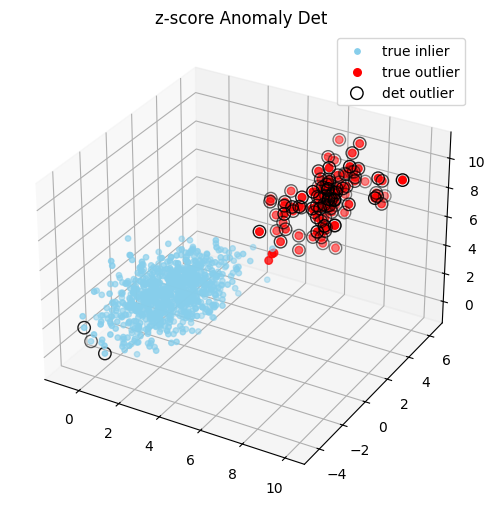

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from pyod.utils.data import generate_data


n = 1000
cont = 0.1

X_train, y_train, X_test, y_test = generate_data(
    n_train=n,
    n_test=100,
    n_features=1,
    contamination=cont,
    random_state=42
)

n_in = np.sum(y_true == 0)
n_out = np.sum(y_true == 1)
print(f"Inliers: {n_in}, Outliers: {n_out}")

mu = np.array([2, -1, 3])
Sigma = np.array([[1.0, 0.6, 0.4],
                  [0.6, 1.2, 0.5],
                  [0.4, 0.5, 1.5]])

L = np.linalg.cholesky(Sigma)

Xin = np.random.randn(3, n_in)
Yin = (L @ Xin).T + mu

Xout = np.random.randn(3, n_out)
Yout = (L @ Xout).T + (mu + np.array([5, 5, 5]))

Y = np.vstack([Yin, Yout])

Y = Y[np.argsort(np.concatenate([np.where(y_true == 0)[0],
                                 np.where(y_true == 1)[0]]))]

zs = np.abs((Y - Y.mean(0)) / Y.std(0))
z = np.linalg.norm(zs, axis=1)

thr = np.quantile(z, 1 - cont)
y_pred = (z > thr).astype(int)

acc = balanced_accuracy_score(y_true, y_pred)
print(f"thr={thr:.3f}, bal_acc={acc:.3f}")

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y[y_true==0, 0], Y[y_true==0, 1], Y[y_true==0, 2],
           c='skyblue', s=15, label='true inlier')
ax.scatter(Y[y_true==1, 0], Y[y_true==1, 1], Y[y_true==1, 2],
           c='r', s=30, label='true outlier')
ax.scatter(Y[y_pred==1, 0], Y[y_pred==1, 1], Y[y_pred==1, 2],
           edgecolor='k', facecolor='none', s=80, label='det outlier')
ax.set_title("z-score Anomaly Det")
ax.legend()
plt.show()
